In [1]:
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import numpy as np
from skimage import io, color, feature
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate

### Data distribution 

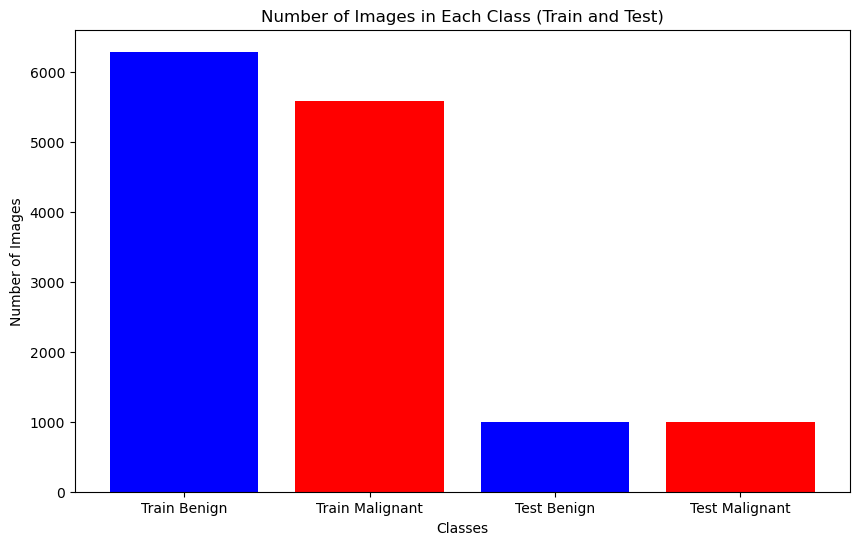

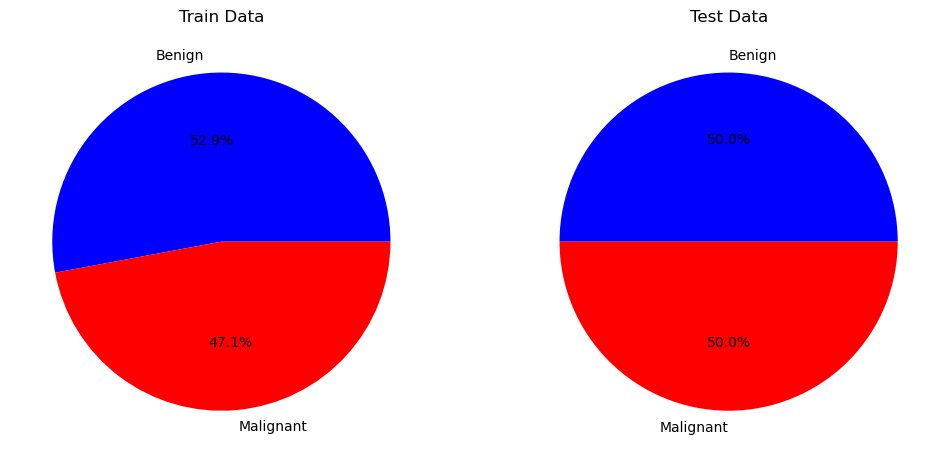

In [2]:
# Define the directories
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Function to count images in each class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in train and test directories
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Combine counts for bar plot
combined_counts = {
    'Train Benign': train_counts.get('Benign', 0),
    'Train Malignant': train_counts.get('Malignant', 0),
    'Test Benign': test_counts.get('Benign', 0),
    'Test Malignant': test_counts.get('Malignant', 0)
}

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(combined_counts.keys(), combined_counts.values(), color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train and Test)')
plt.show()

# Plot pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for train data
axs[0].pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
axs[0].set_title('Train Data')

# Pie chart for test data
axs[1].pie(test_counts.values(), labels=test_counts.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
axs[1].set_title('Test Data')

plt.show()


### Displaying images

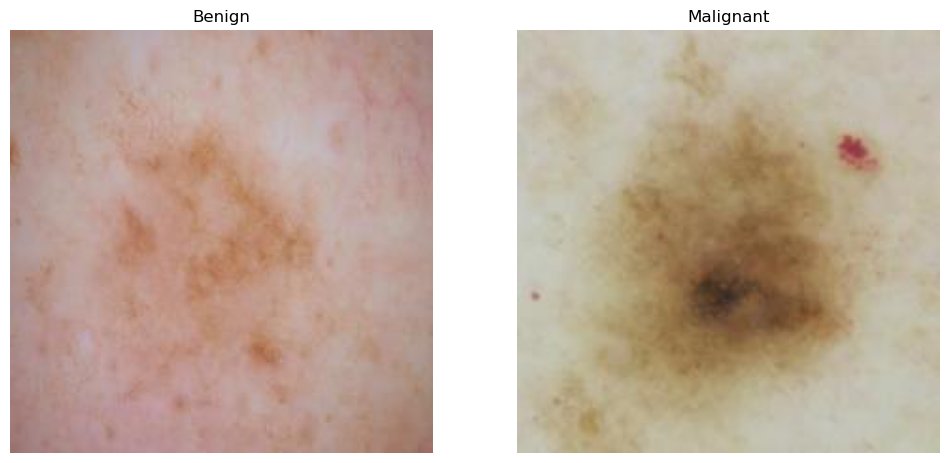

In [3]:
# Function to get a random image path from a class directory
def get_random_image_path(class_dir):
    image_files = os.listdir(class_dir)
    random_image_file = random.choice(image_files)
    return os.path.join(class_dir, random_image_file)

# Get the paths to the random images
benign_dir = os.path.join(train_dir, 'Benign')
malignant_dir = os.path.join(train_dir, 'Malignant')

benign_image_path = get_random_image_path(benign_dir)
malignant_image_path = get_random_image_path(malignant_dir)

# Load and display the images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display Benign image
benign_image = mpimg.imread(benign_image_path)
axs[0].imshow(benign_image)
axs[0].set_title('Benign')
axs[0].axis('off')

# Display Malignant image
malignant_image = mpimg.imread(malignant_image_path)
axs[1].imshow(malignant_image)
axs[1].set_title('Malignant')
axs[1].axis('off')

plt.show()

## EDA

#### Histogram with pixel intensity of images for each class

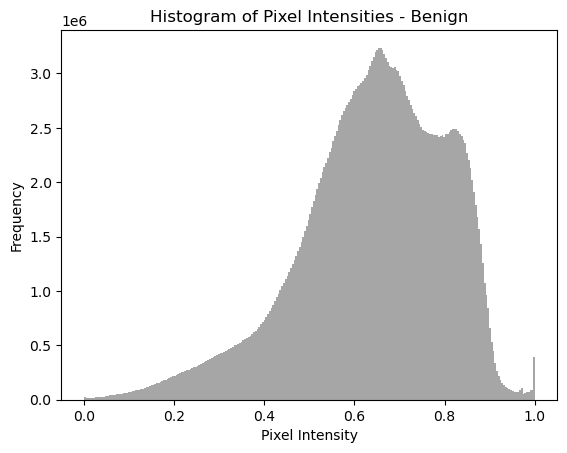

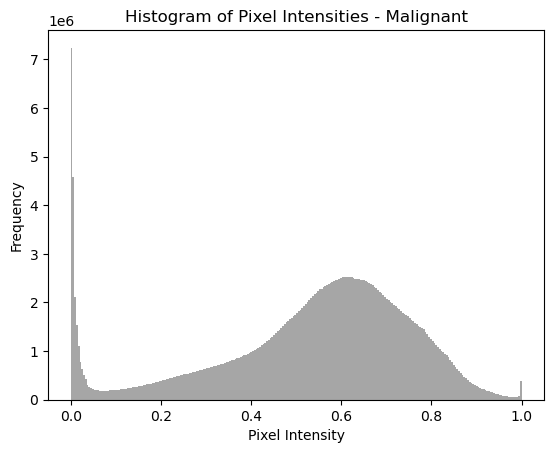

In [4]:
# Function to get all image paths from a class directory
def get_image_paths(class_dir):
    return [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]

# Function to load images and convert them to grayscale
def load_images(image_paths):
    images = [color.rgb2gray(io.imread(img_path)) for img_path in image_paths]
    return images

# Function to plot histogram of pixel values
def plot_histogram(images, title):
    pixel_values = np.concatenate([img.flatten() for img in images])
    plt.hist(pixel_values, bins=256, range=(0, 1), color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

# Plot histograms
plot_histogram(benign_images, 'Histogram of Pixel Intensities - Benign')
plot_histogram(malignant_images, 'Histogram of Pixel Intensities - Malignant')


### Pixel intensity on RGB channels

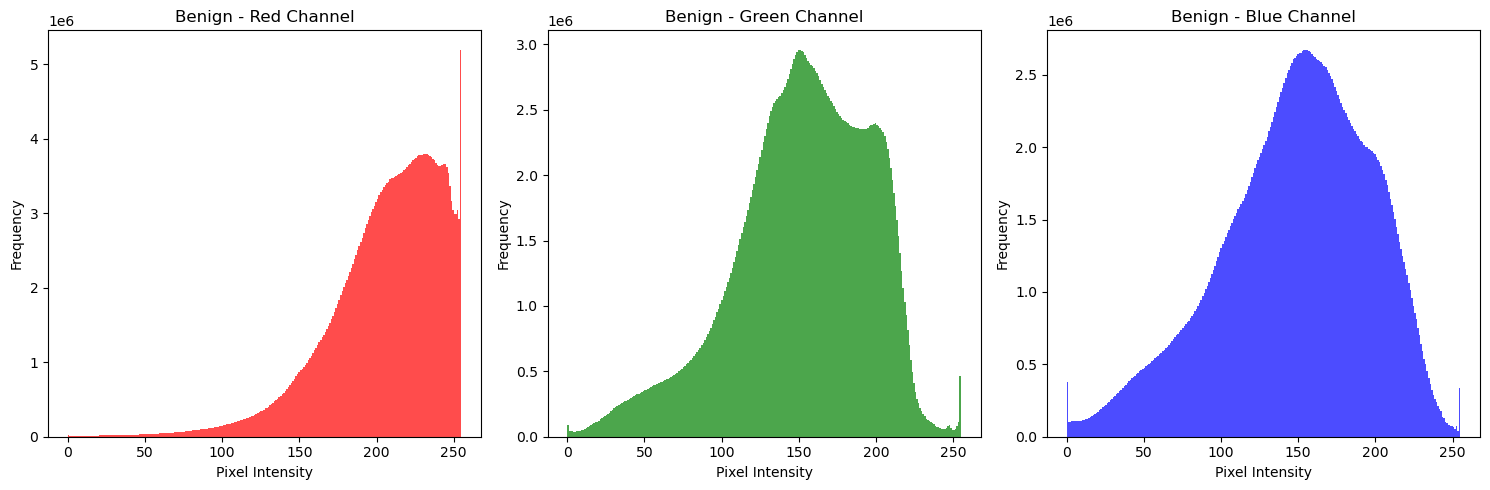

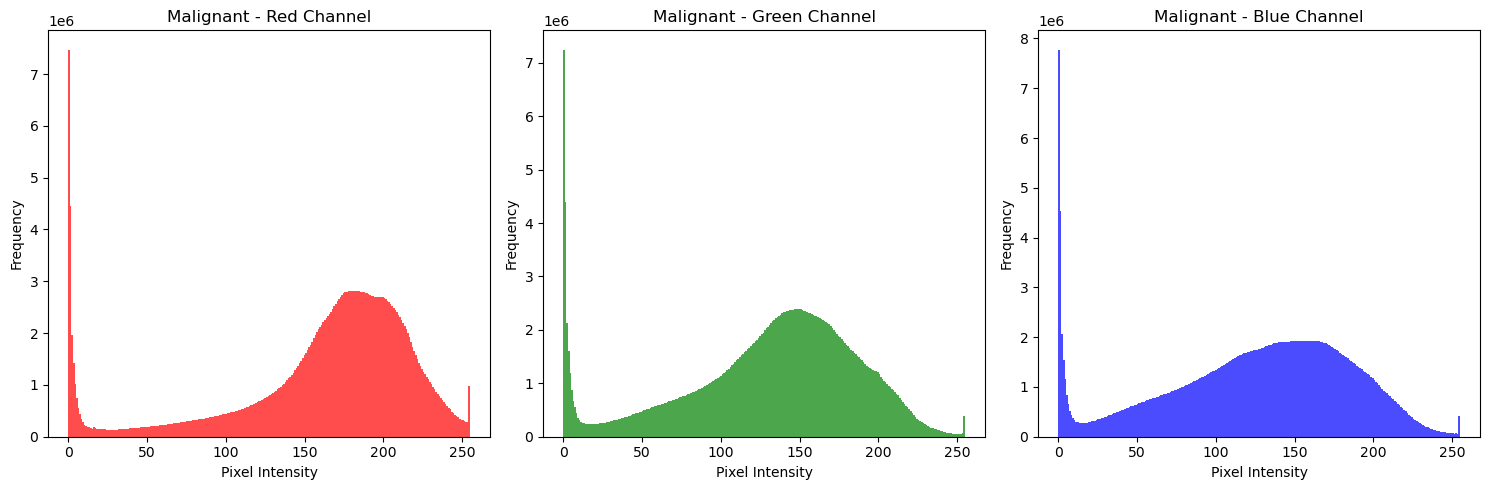

In [5]:
# Function to get all image paths from a class directory
def get_image_paths(class_dir):
    return [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]

# Function to load images and extract RGB channels
def load_images_and_extract_rgb(image_paths):
    red_channel = []
    green_channel = []
    blue_channel = []
    for img_path in image_paths:
        image = io.imread(img_path)
        red_channel.append(image[:, :, 0].flatten())
        green_channel.append(image[:, :, 1].flatten())
        blue_channel.append(image[:, :, 2].flatten())
    return np.concatenate(red_channel), np.concatenate(green_channel), np.concatenate(blue_channel)

# Function to plot RGB histograms
def plot_rgb_histograms(red_channel, green_channel, blue_channel, title):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(red_channel, bins=256, color='red', alpha=0.7)
    plt.title(f'{title} - Red Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(green_channel, bins=256, color='green', alpha=0.7)
    plt.title(f'{title} - Green Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(blue_channel, bins=256, color='blue', alpha=0.7)
    plt.title(f'{title} - Blue Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images and extract RGB channels
benign_red, benign_green, benign_blue = load_images_and_extract_rgb(benign_image_paths)
malignant_red, malignant_green, malignant_blue = load_images_and_extract_rgb(malignant_image_paths)

# Plot RGB histograms for each class
plot_rgb_histograms(benign_red, benign_green, benign_blue, 'Benign')
plot_rgb_histograms(malignant_red, malignant_green, malignant_blue, 'Malignant')


### Looking for texture patterns in images

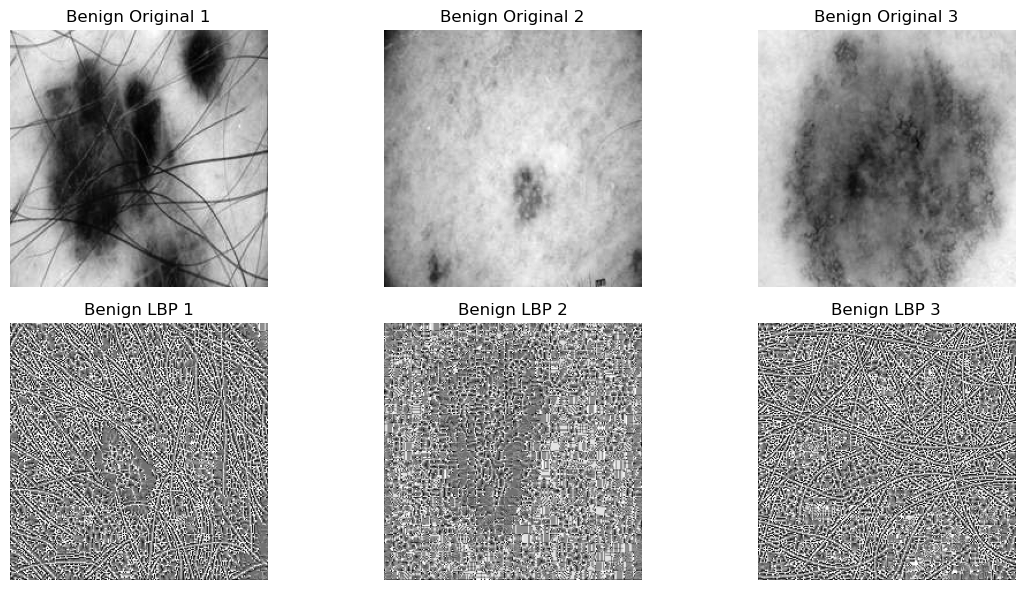

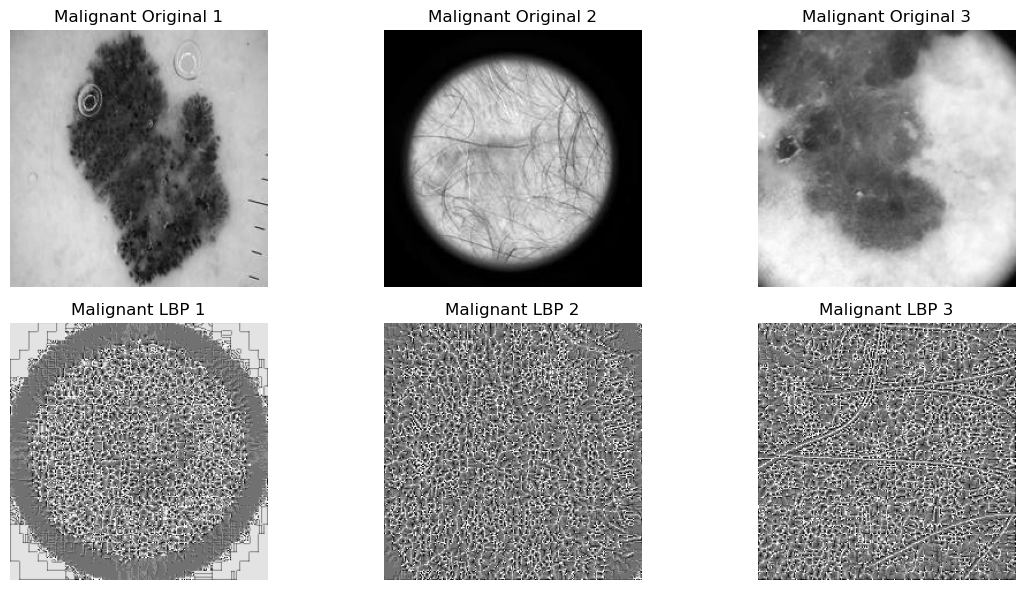

In [6]:
# Function to get all image paths from a class directory
def get_image_paths(class_dir):
    return [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]

# Function to load images and convert them to grayscale
def load_images(image_paths):
    return [color.rgb2gray(io.imread(img_path)) for img_path in image_paths]

# Function to compute LBP for images
def compute_lbp(images, P=8, R=1):
    lbp_images = [feature.local_binary_pattern(image, P, R, method='uniform') for image in images]
    return lbp_images

# Function to plot original and LBP images side by side
def plot_lbp_images(original_images, lbp_images, title):
    plt.figure(figsize=(12, 6))
    for i in range(3):
        plt.subplot(2, 3, i + 1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'{title} Original {i+1}')
        plt.axis('off')
        
        plt.subplot(2, 3, i + 4)
        plt.imshow(lbp_images[i], cmap='gray')
        plt.title(f'{title} LBP {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get image paths for each class
benign_image_paths = get_image_paths(os.path.join(train_dir, 'Benign'))
malignant_image_paths = get_image_paths(os.path.join(train_dir, 'Malignant'))

# Load images and compute LBP
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

benign_lbp_images = compute_lbp(benign_images)
malignant_lbp_images = compute_lbp(malignant_images)

# Plot original and LBP images for a few random samples
plot_lbp_images(random.sample(benign_images, 3), random.sample(benign_lbp_images, 3), 'Benign')
plot_lbp_images(random.sample(malignant_images, 3), random.sample(malignant_lbp_images, 3), 'Malignant')


### Data preprocessing

#### Apply SIFT algorithm

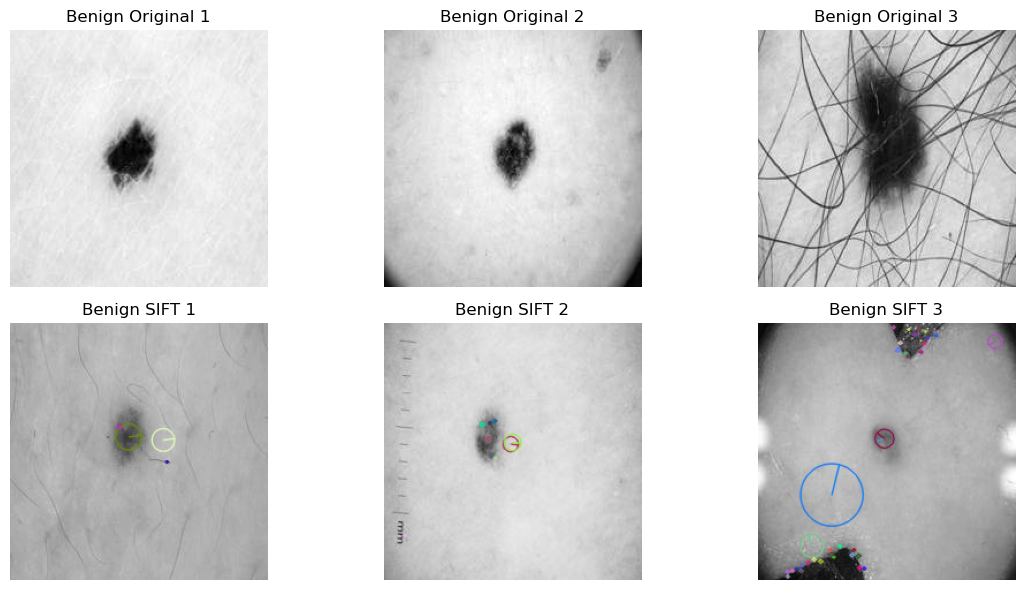

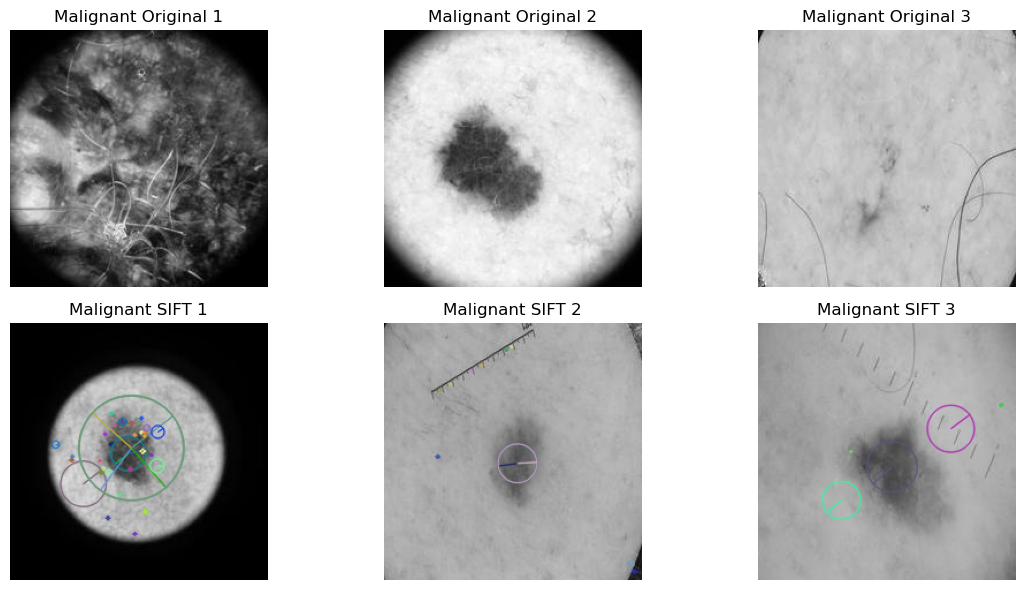

In [13]:
# Function to load images from paths
def load_images(image_paths):
    images = []
    for path in image_paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(image)
    return images

# Function to apply SIFT and draw keypoints on images
def apply_sift(images):
    sift = cv2.SIFT_create()
    sift_images = []
    for image in images:
        keypoints, descriptors = sift.detectAndCompute(image, None)
        sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        sift_images.append(sift_image)
    return sift_images

# Function to plot original and SIFT images side by side
def plot_sift_images(original_images, sift_images, title):
    plt.figure(figsize=(12, 6))
    for i in range(3):
        plt.subplot(2, 3, i + 1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'{title} Original {i+1}')
        plt.axis('off')
        
        plt.subplot(2, 3, i + 4)
        plt.imshow(sift_images[i], cmap='gray')
        plt.title(f'{title} SIFT {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

train_dir = './dataset/train'
benign_dir = os.path.join(train_dir, 'Benign')
malignant_dir = os.path.join(train_dir, 'Malignant')

# Function to get image paths from directory
def get_image_paths(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory)]

# Get image paths for each class
benign_image_paths = get_image_paths(benign_dir)
malignant_image_paths = get_image_paths(malignant_dir)
# Load images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

# Apply SIFT
benign_sift_images = apply_sift(benign_images)
malignant_sift_images = apply_sift(malignant_images)

# Plot original and SIFT images for a few random samples
plot_sift_images(random.sample(benign_images, 3), random.sample(benign_sift_images, 3), 'Benign')
plot_sift_images(random.sample(malignant_images, 3), random.sample(malignant_sift_images, 3), 'Malignant')

#### Perform data augumentation

In [ ]:
# Function to apply SIFT and draw keypoints on images
def apply_sift(image):
    # Convert image to grayscale if it's not already
    if image.ndim == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray_image = image.copy()

    # Ensure image is in correct format (CV_8U) for SIFT
    if gray_image.dtype != np.uint8:
        gray_image = gray_image.astype(np.uint8)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    sift_image = cv2.drawKeypoints(gray_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return sift_image

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(15, 6))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(f'{title} Image {i+1}')
        plt.axis('off')
    plt.show()

# Data augmentation setup with ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for reading images from directory with augmentation
batch_size = 5
generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Generate augmented images and apply SIFT
augmented_images = []
for _ in range(batch_size):
    batch = generator.next()
    for img in batch[0]:
        sift_image = apply_sift(img)
        augmented_images.append(sift_image)

# Display random 5 images from each class
display_images(augmented_images[:5], 'Benign Augmented')
display_images(augmented_images[5:], 'Malignant Augmented')


### Simple CNN model without SIFT preprocessing

In [15]:
# Define parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 10
validation_split = 0.2  # 20% of training data will be used for validation

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=validation_split  # Specify validation split here
)

# Generate training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' if more than 2 classes
    subset='training'  # Specify this is the training set
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Use 'categorical' if more than 2 classes
    subset='validation'  # Specify this is the validation set
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' and change units for more than 2 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1
)

Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.
Epoch 1/10
297/297 [==============================] - 23s 73ms/step - loss: 0.5407 - accuracy: 0.7192 - val_loss: 0.5834 - val_accuracy: 0.7242
Epoch 2/10
297/297 [==============================] - 21s 71ms/step - loss: 0.4005 - accuracy: 0.8181 - val_loss: 0.5058 - val_accuracy: 0.7665
Epoch 3/10
297/297 [==============================] - 22s 73ms/step - loss: 0.3682 - accuracy: 0.8359 - val_loss: 0.5241 - val_accuracy: 0.7711
Epoch 4/10
297/297 [==============================] - 22s 74ms/step - loss: 0.3385 - accuracy: 0.8530 - val_loss: 0.6093 - val_accuracy: 0.7479
Epoch 5/10
297/297 [==============================] - 23s 76ms/step - loss: 0.3254 - accuracy: 0.8572 - val_loss: 0.4912 - val_accuracy: 0.7829
Epoch 6/10
297/297 [==============================] - 25s 83ms/step - loss: 0.3143 - accuracy: 0.8648 - val_loss: 0.5246 - val_accuracy: 0.7449
Epoch 7/10
297/297 [==============================] 

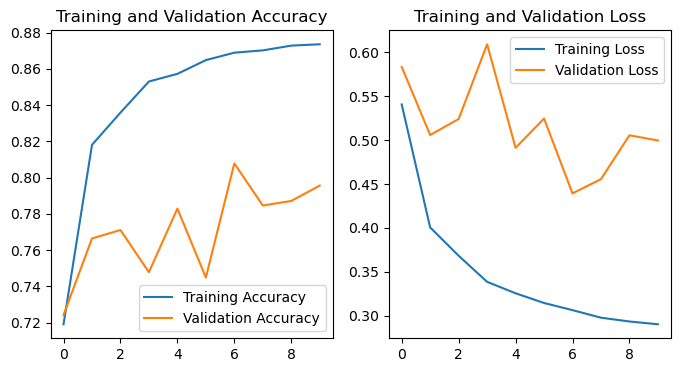

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

#### Simple CNN model with SIFT

In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_images(image_paths):
    images = []
    for path in image_paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(cv2.resize(image, (128, 128)))  # Resize to 128x128
    return np.array(images)

# Function to apply SIFT and extract keypoints
def apply_sift(images, max_features=1024):
    sift = cv2.SIFT_create()
    sift_features = []
    for image in images:
        keypoints, descriptors = sift.detectAndCompute(image, None)
        if descriptors is not None:
            descriptors = descriptors.flatten()
            if descriptors.shape[0] < max_features:
                descriptors = np.pad(descriptors, (0, max_features - descriptors.shape[0]), 'constant')
            else:
                descriptors = descriptors[:max_features]
        else:
            descriptors = np.zeros(max_features)  # Handle images without SIFT features
        sift_features.append(descriptors)
    return np.array(sift_features)

# Example paths (replace with your actual paths)
train_dir = './dataset/train'
benign_dir = os.path.join(train_dir, 'Benign')
malignant_dir = os.path.join(train_dir, 'Malignant')

# Function to get image paths from directory
def get_image_paths(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory)]

# Get image paths for each class
benign_image_paths = get_image_paths(benign_dir)
malignant_image_paths = get_image_paths(malignant_dir)

# Load images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

# Apply SIFT
benign_sift_features = apply_sift(benign_images)
malignant_sift_features = apply_sift(malignant_images)

# Combine images and SIFT features
X_benign = np.array([img.reshape(128, 128, 1) for img in benign_images])
X_malignant = np.array([img.reshape(128, 128, 1) for img in malignant_images])
X = np.concatenate([X_benign, X_malignant], axis=0)
SIFT_features = np.concatenate([benign_sift_features, malignant_sift_features], axis=0)

# Labels (0 for benign, 1 for malignant)
y_benign = np.zeros(len(benign_images))
y_malignant = np.ones(len(malignant_images))
y = np.concatenate([y_benign, y_malignant], axis=0)
y = to_categorical(y)

# Split into training and testing data
X_train, X_test, SIFT_train, SIFT_test, y_train, y_test = train_test_split(X, SIFT_features, y, test_size=0.2, random_state=42)

# Define the model
def build_model(input_shape_image, input_shape_sift):
    image_input = Input(shape=input_shape_image)
    sift_input = Input(shape=input_shape_sift)
    
    # Image part
    x = Conv2D(32, (3, 3), activation='relu')(image_input)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    
    # SIFT part
    y = Dense(128, activation='relu')(sift_input)
    
    # Merge both parts
    merged = concatenate([x, y])
    z = Dense(128, activation='relu')(merged)
    output = Dense(2, activation='softmax')(z)
    
    model = Model(inputs=[image_input, sift_input], outputs=output)
    return model

# Build and compile the model
input_shape_image = (128, 128, 1)
input_shape_sift = (1024,)
model = build_model(input_shape_image, input_shape_sift)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([X_train, SIFT_train], y_train, epochs=6, batch_size=16, validation_data=([X_test, SIFT_test], y_test))

Epoch 1/6
594/594 [==============================] - 26s 35ms/step - loss: 82.9191 - accuracy: 0.7164 - val_loss: 0.4807 - val_accuracy: 0.7706
Epoch 2/6
594/594 [==============================] - 20s 34ms/step - loss: 0.4326 - accuracy: 0.7961 - val_loss: 0.4653 - val_accuracy: 0.8013
Epoch 3/6
594/594 [==============================] - 21s 35ms/step - loss: 0.3367 - accuracy: 0.8518 - val_loss: 0.4765 - val_accuracy: 0.8093
Epoch 4/6
594/594 [==============================] - 21s 35ms/step - loss: 0.2640 - accuracy: 0.8921 - val_loss: 0.5705 - val_accuracy: 0.7955
Epoch 5/6
594/594 [==============================] - 21s 35ms/step - loss: 0.1785 - accuracy: 0.9255 - val_loss: 0.6725 - val_accuracy: 0.7959
Epoch 6/6
594/594 [==============================] - 21s 35ms/step - loss: 0.1529 - accuracy: 0.9395 - val_loss: 0.8281 - val_accuracy: 0.7748


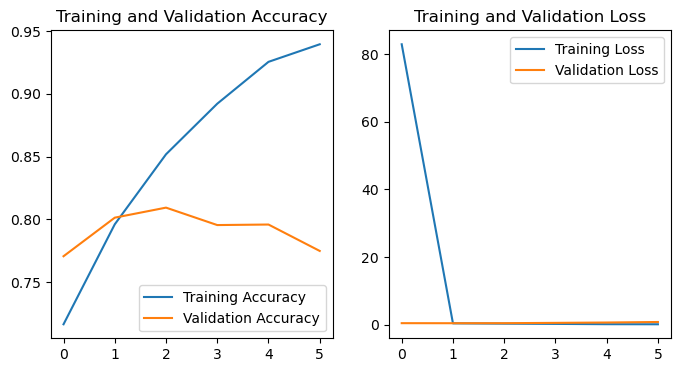

In [2]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(6)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [1]:
from datasets import load_dataset
train_dir = './dataset/train'
ds = load_dataset('imagefolder',data_dir=train_dir)

Resolving data files:   0%|          | 0/11879 [00:00<?, ?it/s]

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 11879
    })
})

In [3]:
data = ds['train'].train_test_split(test_size=0.2)

In [4]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 9503
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2376
    })
})

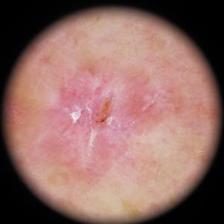

In [5]:
ex = data['train'][0]
ex['image']

In [6]:
train = data['train']
test = data['test']

def hf_dataset_to_tf(data, batch_size=1):
    return data.to_tf_dataset(
        columns='image',  # Pass a single string instead of a list
        label_cols='label',  # Pass a single string instead of a list
        batch_size=batch_size,
        shuffle=True
    )
# Convert datasets
train_dataset = hf_dataset_to_tf(train)
test_dataset = hf_dataset_to_tf(test)

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing, Rescaling, Permute,Input,Dense

resize_rescale = tf.keras.Sequential([
    Resizing(224, 224),
    Rescaling(1./255),
    Permute((3, 1, 2))
])


In [8]:
from transformers import TFCvtModel
base_model = TFCvtModel.from_pretrained("microsoft/cvt-13")
for layer in base_model.layers:
    layer.trainable = False

# Define the model
inputs = Input(shape=(224, 224, 3))
x = resize_rescale(inputs)
x = base_model.cvt(x)[1][:, 0, :]
output = Dense(2)(x)  # Linear activation, no activation function
hf_model = tf.keras.Model(inputs=inputs, outputs=output)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFCvtModel: ['cvt.encoder.stages.1.layers.0.attention.attention.convolution_projection_value.convolution_projection.normalization.num_batches_tracked', 'cvt.encoder.stages.2.layers.2.attention.attention.convolution_projection_key.convolution_projection.normalization.num_batches_tracked', 'cvt.encoder.stages.2.layers.8.attention.attention.convolution_projection_query.convolution_projection.normalization.num_batches_tracked', 'cvt.encoder.stages.2.layers.0.attention.attention.convolution_projection_key.convolution_projection.normalization.num_batches_tracked', 'cvt.encoder.stages.2.layers.5.attention.attention.convolution_projection_query.convolution_projection.normalization.num_batches_tracked', 'cvt.encoder.stages.0.layers.0.attention.attention.convolution_projection_query.convolution_projection.normalization.num_batches_tracked', 'cvt.encoder.stages.2.layers.3.attention.attention.convolution_projection_

In [9]:
hf_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 3, 224, 224)       0         
                                                                 
 cvt (TFCvtMainLayer)        TFBaseModelOutputWithCLS  19637440  
                             Token(last_hidden_state=            
                             (None, 384, 14, 14),                
                              cls_token_value=(None,             
                             1, 384),                            
                              hidden_states=None)                
                                                                 
 tf.__operators__.getitem (S  (None, 384)              0         
 licingOpLambda)                                             

In [10]:
hf_model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
hf_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=4,
    batch_size=2,
    verbose=1
)

Epoch 1/4


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(6)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
labels = data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [42]:
id2label[str(0)]


'Benign'

In [43]:
from transformers import AutoImageProcessor

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

size = (image_processor.size["height"], image_processor.size["width"])

train_data_augmentation = keras.Sequential(
    [
        layers.RandomCrop(size[0], size[1]),
        layers.Rescaling(scale=1.0 / 127.5, offset=-1),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="train_data_augmentation",
)

val_data_augmentation = keras.Sequential(
    [
        layers.CenterCrop(size[0], size[1]),
        layers.Rescaling(scale=1.0 / 127.5, offset=-1),
    ],
    name="val_data_augmentation",
)

In [45]:
import numpy as np
import tensorflow as tf
from PIL import Image


def convert_to_tf_tensor(image: Image):
    np_image = np.array(image)
    tf_image = tf.convert_to_tensor(np_image)
    # `expand_dims()` is used to add a batch dimension since
    # the TF augmentation layers operates on batched inputs.
    return tf.expand_dims(tf_image, 0)


def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    images = [
        train_data_augmentation(convert_to_tf_tensor(image.convert("RGB"))) for image in example_batch["image"]
    ]
    example_batch["pixel_values"] = [tf.transpose(tf.squeeze(image)) for image in images]
    return example_batch


def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    images = [
        val_data_augmentation(convert_to_tf_tensor(image.convert("RGB"))) for image in example_batch["image"]
    ]
    example_batch["pixel_values"] = [tf.transpose(tf.squeeze(image)) for image in images]
    return example_batch

In [46]:
data["train"].set_transform(preprocess_train)
data["test"].set_transform(preprocess_val)


from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")
import evaluate

accuracy = evaluate.load("accuracy")
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [49]:
from transformers import create_optimizer

batch_size = 16
num_epochs = 5
num_train_steps = len(data["train"]) * num_epochs
learning_rate = 3e-5
weight_decay_rate = 0.01

optimizer, lr_schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    weight_decay_rate=weight_decay_rate,
    num_warmup_steps=0,
)

In [50]:
from transformers import TFAutoModelForImageClassification

model = TFAutoModelForImageClassification.from_pretrained(
    checkpoint,
    id2label=id2label,
    label2id=label2id,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
tf_train_dataset = data["train"].to_tf_dataset(
    columns="pixel_values", label_cols="label", shuffle=True, batch_size=batch_size, collate_fn=None
)

# converting our test dataset to tf.data.Dataset
tf_eval_dataset = data["test"].to_tf_dataset(
    columns="pixel_values", label_cols="label", shuffle=True, batch_size=batch_size, collate_fn=None
)

In [53]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss)

In [54]:
from transformers.keras_callbacks import KerasMetricCallback, PushToHubCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_eval_dataset)

callbacks = [metric_callback]

In [55]:
from transformers.keras_callbacks import KerasMetricCallback, PushToHubCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_eval_dataset)

callbacks = [metric_callback]

In [ ]:
model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=num_epochs, callbacks=callbacks)